In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

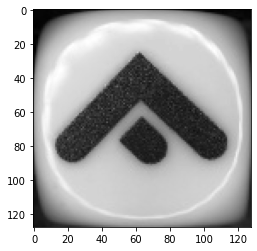

In [2]:
img = Image.open("../../data/train_set/08/16_09_21_08_020.png")
plt.imshow(img, cmap="gray")

In [3]:
img = np.array(img)

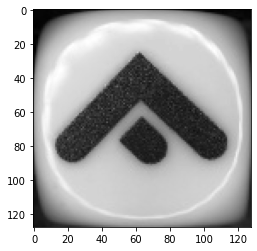

In [4]:
plt.imshow(img, cmap="gray")

In [5]:
img.shape

(128, 128)

In [6]:
print(img[0])

[ 15  15  15  15  15  15  15  14  13  15  15  16  17  16  16  19  17  17
  16  18  20  19  17  18  18  20  20  22  25  25  24  23  22  25  29  32
  36  44  54  60  72  78  86  92  98 104 109 112 115 117 120 122 125 126
 127 127 129 129 129 130 131 132 132 132 133 133 132 130 129 128 127 127
 123 123 123 122 120 116 112 109 105 102  96  89  83  75  67  60  51  44
  36  30  26  23  20  17  18  16  18  19  17  15  16  16  14  14  15  15
  13  13  14  13  12  14  16  17  16  18  18  16  15  13  13  13  12  12
  13  12]


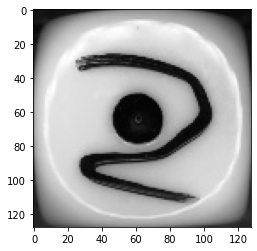

In [7]:
img = Image.open("../../data/train_set/ano/17_11_21_anomalies_000.png")
plt.imshow(img, cmap="gray")

In [43]:
def create_dataset():
    directory = "../../data/train_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+"0"+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i)
            if len(data)% 100 ==0:
                break
    for filename in os.listdir(directory+"10"):
            if filename.endswith(".png"):
                img = Image.open(directory+"10/"+filename)
                data.append(np.array(img))
                label.append(10)
            if len(data)% 100 ==0:
                break
    print(len(data))
    return data, label
            
        

In [44]:
data, labels= create_dataset()

1100


In [10]:
data[:10][1]

array([[81, 83, 83, ..., 39, 39, 39],
       [85, 85, 85, ..., 37, 38, 38],
       [89, 89, 87, ..., 36, 37, 39],
       ...,
       [28, 29, 31, ..., 67, 66, 65],
       [27, 29, 30, ..., 68, 68, 67],
       [26, 27, 28, ..., 67, 66, 66]], dtype=uint8)

In [45]:
data = np.array(data)
data.shape

(1100, 128, 128)

In [46]:
preprocessed_data = data/255
labels= np.array(labels).reshape(-1,1)

In [47]:
print("Drawings shape before : ", preprocessed_data.shape)
preprocessed_data = np.expand_dims(preprocessed_data, axis=3)
print("Drawings shape after : ", preprocessed_data.shape)
print("Label shape : ", labels.shape)

Drawings shape before :  (1100, 128, 128)
Drawings shape after :  (1100, 128, 128, 1)
Label shape :  (1100, 1)


In [27]:
# import pickle as pkl

# filename = '../../resources/CNN_Input'
# fileObject = open(filename, 'wb')

# pkl.dump(preprocessed_data, fileObject)
# fileObject.close()

# filename = '../../resources/CNN_labels'
# fileObject = open(filename, 'wb')
# pkl.dump(labels, fileObject)
# fileObject.close()

In [132]:
from sklearn.model_selection import train_test_split

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    preprocessed_data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)

In [122]:
import tensorflow as tf
from tensorflow.keras import layers, models

# pixel width and height of our images
input_size = 28

# number of filters in the convnet layer
filters = 10

# conv net parameters
strides = (2, 2)
pool_size = (2,2)
kernel_size = (5, 5)

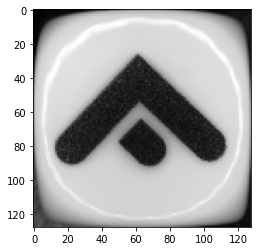

In [35]:
plt.imshow(preprocessed_data[400], cmap="gray")

In [133]:
model = tf.keras.Sequential(
    [
        layers.Conv2D(filters, kernel_size, activation = "relu", input_shape= (128,128, 1)),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Conv2D(filters/2, kernel_size, activation = "relu"),
        layers.MaxPool2D(pool_size=pool_size, strides= strides, padding='same'),
        layers.Dropout(0.2), # dropout layer is there to defeat overfitting
        layers.Flatten(),
        layers.Dense(units=11),
    ]
)

# model.build()
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 124, 124, 10)      260       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 58, 58, 5)         1255      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 29, 29, 5)        0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 29, 29, 5)         0         
                                                                 
 flatten_11 (Flatten)        (None, 4205)            

In [135]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001), loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'])

history = model.fit(x=train_data,y=train_labels, validation_data=(train_val_data, train_val_labels), epochs=10)

Epoch 1/10
20/20 [==============================] - 9s 410ms/step - loss: 2.3866 - accuracy: 0.1769 - val_loss: 2.3021 - val_accuracy: 0.3955
Epoch 2/10
20/20 [==============================] - 8s 394ms/step - loss: 2.2492 - accuracy: 0.3490 - val_loss: 2.1573 - val_accuracy: 0.5977
Epoch 3/10
20/20 [==============================] - 9s 482ms/step - loss: 2.0784 - accuracy: 0.5893 - val_loss: 1.9481 - val_accuracy: 0.8375
Epoch 4/10
20/20 [==============================] - 10s 485ms/step - loss: 1.8409 - accuracy: 0.7435 - val_loss: 1.6343 - val_accuracy: 0.9193
Epoch 5/10
20/20 [==============================] - 10s 517ms/step - loss: 1.5041 - accuracy: 0.8214 - val_loss: 1.2302 - val_accuracy: 0.9955
Epoch 6/10
20/20 [==============================] - 11s 569ms/step - loss: 1.0877 - accuracy: 0.8880 - val_loss: 0.8112 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 10s 527ms/step - loss: 0.7203 - accuracy: 0.9237 - val_loss: 0.5063 - val_accuracy: 1.0000
Ep

In [136]:
model.evaluate(test_data, test_labels, verbose=0)

[0.13879801332950592, 1.0]

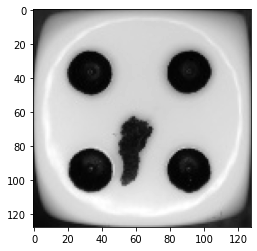

In [137]:
img = Image.open("../../data/train_set/ano/img_24868_cropped.jpg")
plt.imshow(img, cmap="gray")

In [138]:
prediction = model.predict(np.array(img).reshape(1, 128, 128, 1))
print(prediction)

[[-1446.5634    -530.45184   -437.21985   -800.5255    -666.9032
    199.2256     -61.862747 -1687.6351   -1722.1913   -1510.5292
  -1580.3435  ]]


In [139]:
classes = np.argmax(prediction, axis = 1)
print(classes)

[5]


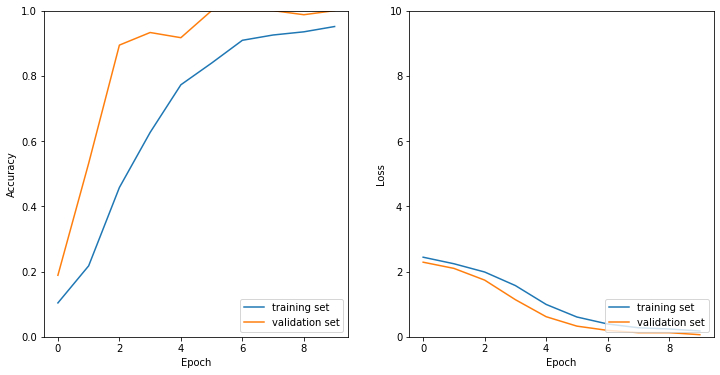

In [94]:
def plot_history(history):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

In [110]:
def create_test_dataset():
    directory = "../../data/test_set/"
    data= []
    label= []
    for i in range(0, 10):
        for filename in os.listdir(directory+"0"+str(i)):
            if filename.endswith(".png"):
                img = Image.open(directory+"0"+str(i)+"/"+filename)
                data.append(np.array(img))
                label.append(i)
            
    for filename in os.listdir(directory+"10"):
            if filename.endswith(".png"):
                img = Image.open(directory+"10/"+filename)
                data.append(np.array(img))
                label.append(10)
            
    print(len(data))
    return data, label

In [111]:
test_data, test_labels= create_test_dataset()

330


In [112]:
preprocessed_test_data = np.array(test_data)/255
test_labels= np.array(test_labels).reshape(-1,1)

In [113]:
model.evaluate(preprocessed_test_data, test_labels, verbose=0)

[0.06897535920143127, 1.0]

In [116]:
print(test_labels[200])

[6]


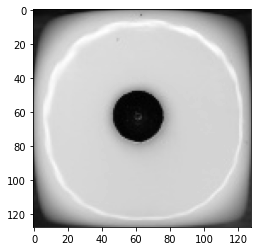

In [120]:
plt.imshow(preprocessed_test_data[2], cmap="gray")

In [121]:
prediction = model.predict(preprocessed_test_data[2].reshape(1, 128, 128, 1))
classes = np.argmax(prediction, axis = 1)
print(classes)

[0]
